In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the Excel file
df = pd.read_excel("default of credit card clients.xls")

# Set seed and split: 700 train, 300 test (for 1000 rows total)
train_df, test_df = train_test_split(
    df,
    train_size=700,      # or train_size=0.7
    test_size=300,       # or test_size=0.3
    random_state=123,    # seed for reproducibility
    shuffle=True
)

# Optional: reset indices
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
np.random.seed(42)

# Load dataset
df = pd.read_excel("default of credit card clients.xls")

# If you only want the first 1000 observations
df = df.iloc[:1000]

# Split into training (700) and test (300)
train_df, test_df = train_test_split(
    df,
    train_size=700,
    test_size=300,
    random_state=42,
    shuffle=True
)

# Check sizes
print("Training size:", train_df.shape)
print("Test size:", test_df.shape)
print(df.columns)


Training size: (700, 25)
Test size: (300, 25)
Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')


C:\Users\fedab\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\fedab\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\fedab\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\fedab\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\fedab\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probab

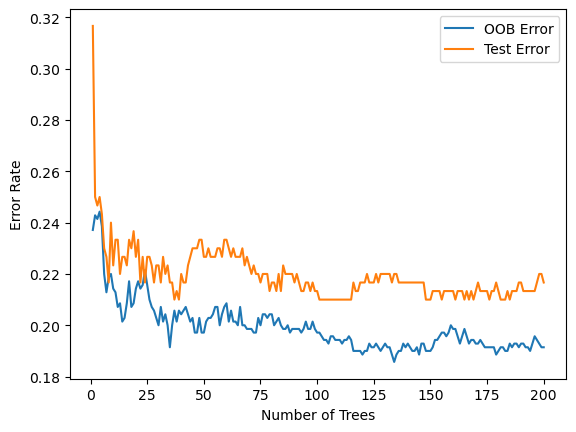

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Set seed
np.random.seed(100)

# 2. Load data correctly (IMPORTANT FIX)
df = pd.read_excel(
    "default of credit card clients.xls", header=1
)

# Use first 1000 observations
df = df.iloc[:1000]

# Drop ID column if present
if "ID" in df.columns:
    df = df.drop("ID", axis=1)

# 3. Split data
train_df, test_df = train_test_split(
    df,
    train_size=700,
    test_size=300,
    random_state=123,
    shuffle=True
)

X_train = train_df.drop("default payment next month", axis=1)
y_train = train_df["default payment next month"]

X_test = test_df.drop("default payment next month", axis=1)
y_test = test_df["default payment next month"]

# 4. Train forest and track errors
oob_errors = []
test_errors = []
n_trees_range = range(1, 201)

for n in n_trees_range:
    rf = RandomForestClassifier(
        n_estimators=n,
        max_features=6,
        oob_score=True,
        bootstrap=True,
        random_state=123,
        n_jobs=-1
    )
    
    rf.fit(X_train, y_train)
    
    oob_errors.append(1 - rf.oob_score_)
    y_pred = rf.predict(X_test)
    test_errors.append(1 - accuracy_score(y_test, y_pred))

# 5. Plot
plt.plot(n_trees_range, oob_errors, label="OOB Error")
plt.plot(n_trees_range, test_errors, label="Test Error")
plt.xlabel("Number of Trees")
plt.ylabel("Error Rate")
plt.legend()
plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 1. Load the dataset correctly
# Using read_excel to handle the .xls binary format
try:
    df = pd.read_excel("default of credit card clients.xls", header=1)
except FileNotFoundError:
    # Fallback if the file was renamed in your environment
    df = pd.read_csv("default of credit card clients.xls - Data.csv", header=1)

# Use first 1000 observations to match the experiment
df = df.iloc[:1000]

# Drop ID column if it exists
if "ID" in df.columns:
    df = df.drop("ID", axis=1)

# 2. Split data
# Using a fixed seed for reproducibility
train_df, test_df = train_test_split(
    df, train_size=700, test_size=300, random_state=123, shuffle=True
)

X_train = train_df.drop("default payment next month", axis=1)
y_train = train_df["default payment next month"]

# 3. Fit the Random Forest model
# 150 iterations is a sensible choice based on the error rate plot
rf = RandomForestClassifier(
    n_estimators=150, 
    max_features=6, 
    random_state=123, 
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 4. Define the Recycled Prediction function
def get_recycled_prediction(model, data, column, value):
    """
    Temporarily sets a specific column to a fixed value for every row 
    in the dataset and calculates the average predicted probability.
    """
    temp_data = data.copy()
    temp_data[column] = value
    # index 1 corresponds to the probability of default (bad credit)
    probs = model.predict_proba(temp_data)[:, 1]
    return np.mean(probs)

# 5. Execute the "2 vs 1" comparison
# We use 'PAY_0' (Repayment Status) as the target variable
target_var = 'PAY_0' 

avg_prob_2 = get_recycled_prediction(rf, X_train, target_var, 2)
avg_prob_1 = get_recycled_prediction(rf, X_train, target_var, 1)

# 6. Output the results
print(f"--- Analysis for variable: {target_var} ---")
print(f"Average predicted probability (Value=2): {avg_prob_2:.4f}")
print(f"Average predicted probability (Value=1): {avg_prob_1:.4f}")
print(f"Difference: {avg_prob_2 - avg_prob_1:.4f}")

if avg_prob_2 > avg_prob_1:
    print("\nResult: Higher values increase the probability of bad credit.")
else:
    print("\nResult: Higher values decrease the probability of bad credit.")

--- Analysis for variable: PAY_0 ---
Average predicted probability (Value=2): 0.4811
Average predicted probability (Value=1): 0.2530
Difference: 0.2281

Result: Higher values increase the probability of bad credit.
